In [53]:
# Import libraries here
from autograd import grad
import autograd.numpy as np
from statsmodels import datasets
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

# Mini Batch Gradient Descent

In practice, we can use an approach called Mini batch gradient descent. This approach uses random samples but in batches. This means that we do not calculate the gradients for each observation but for a group of observations which results in a faster optimization. A simple way to implement is to shuffle the observations and then create batches and then proceed with gradient descent using batches. This way we do not use the order in which the training data is sampled. 

# Stochastic Gradient Descent

In our gradient descent algorithm we did the gradients on each observation one by one, but in stochastic gradient descent we can chose the observations randomly. It is called stochastic because samples are selected randomly (or shuffled) instead of as a single group (as in standard gradient descent) or in the order they appear in the training set.

# Full Batch Gradient Descent

This version of the gradient descent is what we encountered in the earlier assignment. All the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch. Epoch, in machine learning, refers to the one entire passing of training data through the algorithm.

**Question 1:** Implement all the above gradient descent algorithms using least squares as the cost function. For the full batch gradient descent, you can use the one from your previous assignment. Save the cost history along with the parameter history this time. Take initial values as:

max_its = 200
w = [3.0,3.0]
alpha = 0.005

In [54]:
def model(x,w):
    y_predicted = w[0] + x * w[1] 
    return y_predicted

In [55]:
def least_squares(w, x, y):
    y_hat = model(x, w)
    return np.mean((y_hat - y)**2)

In [56]:
def gradient_descent_full(g,alpha,max_its,w,x,y):
    parameter_history = [w]
    cost_history = [g(w, x, y)]
    print(cost_history[0])
    gradient = grad(g)
    
    for __ in range(max_its): 
        #  Update the parameters using normal gradient descent
        w -= alpha*gradient(w, x, y)
        # find the new cost
        cost = g(w, x, y )
        # append new weights and cost 
        parameter_history.append(w.copy())
        cost_history.append(cost)
    
    
    return parameter_history, cost_history

In [57]:

def gradient_descent_stochastic(g,alpha,max_its,w,x,y):
    parameter_history = [w.copy()]
    cost_history = [g(w, x, y)]
    print(cost_history[0])

    

    gradient = grad(g)
    for __ in range(max_its):

        i = np.random.randint(len(x))
        
        # define a scalar function within the loop 
        def h(w):
            # [i:i+1] because the function expects a vector 
            return least_squares(w, x[i:i+1], y[i:i+1])
 
        # defining a scalar function
        gradient  = grad(h)

        w -= alpha*gradient(w)

        cost_history.append(g(w, x, y))
        parameter_history.append(w.copy())
        
    
    return parameter_history, cost_history

In [58]:
def gradient_descent_mini_batch(g, alpha, max_its, w, x, y, batch_size=10):
    parameter_history = [w.copy()]
    cost_history = [g(w, x, y)]
    print(cost_history[0])

    gradient = grad(g)

    for _ in range(max_its):
        # shuffle
        perm = np.random.permutation(len(x))
        x_shuffled = x[perm]
        y_shuffled = y[perm]
        # mini-batches
        x_batches = np.array_split(x_shuffled, np.ceil(len(x)/batch_size))
        y_batches = np.array_split(y_shuffled, np.ceil(len(y)/batch_size))

        for xbatch, ybatch in zip(x_batches, y_batches):
            w = w - alpha * gradient(w, xbatch, ybatch)

        parameter_history.append(w.copy())
        cost_history.append(g(w, x, y))

    return np.array(parameter_history), np.array(cost_history)


Pandas provides some built-in datasets. We are using the Nile dataset. You have been provided with x and y and you need to implement all three gradient descent algorithms and call them. 

In [59]:
x = datasets.nile.load_pandas().data["year"]
x = np.array(x)
y = datasets.nile.load_pandas().data["volume"]
y = np.array(y)

# min-max scaling
scaled_x = (x - np.min(x))/(np.max(x) - np.min(x))

## Call your funcitons below
max_its = 200
w = np.array([3.0,3.0])
alpha = 0.005

gd_full_param_history, gd_full_cost_history = gradient_descent_full(least_squares, alpha, max_its, w.copy(), scaled_x, y)
print(gd_full_cost_history[-1])

gd_sto_param_history, gd_sto_cost_history = gradient_descent_stochastic(least_squares, alpha, max_its, w.copy(), scaled_x, y)
print(gd_sto_cost_history[-1])

gd_mini_batch_param_history, gd_mini_batch_cost_history = gradient_descent_mini_batch(least_squares, alpha, max_its, w.copy(), 
                                                                                      scaled_x, y, batch_size = 20)
print(gd_mini_batch_cost_history[-1])

865439.9275757578
54871.10078092039
865439.9275757578
51987.22572766249
865439.9275757578
31703.372986475755


The cost history graphs of all three gradient descents can be plotted on a single graph.

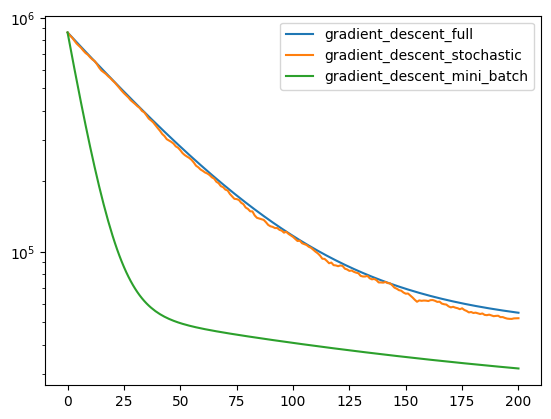

In [60]:
# Plot the graph here
plt.yscale("log")
plt.plot(gd_full_cost_history, label = "gradient_descent_full")
plt.plot(gd_sto_cost_history, label = "gradient_descent_stochastic")
plt.plot(gd_mini_batch_cost_history, label = "gradient_descent_mini_batch")
plt.legend()
plt.show()

# Optimizing Gradient Descent

First, we looked at the gradient descent variants. Next, we shall look into the optimization of gradient descent algorithms. 

## GD with Momentum

For a full batch gradient descent, we use the formula - 

\begin{align}
    θ_n = θ_{n-1} - alpha * gradient
  \end{align}

We modify this formula to get an optimized value of theta or the parameter.

\begin{align}
    v_t = γ * v_{t-1} + alpha * gradient
  \end{align}

\begin{align}
    θ_n = θ_{n-1} - v_t
  \end{align}

where, $v_t$ denotes the change in position. Gamma is generally taken as 0.9 and the initial change in position, i.e., $v_0$ shall be 0. 

Essentially, when using momentum, we push a ball down a hill. The ball accumulates momentum as it rolls downhill, becoming faster and faster on the way (until it reaches its terminal velocity if there is air resistance, i.e. γ<1). The same thing happens to our parameter updates: The momentum term increases for dimensions whose gradients point in the same directions and reduces updates for dimensions whose gradients change directions. As a result, we gain faster convergence and reduced oscillation.

**Question 2:** Modify your gradient descent algorithms from as described above and store the parameter history as well as the cost history. Take the cost function and initial values same as above.

In [ ]:
def mini_batch_gradient_descent_momentum(g,alpha,max_its,w,x,y, batch_size = 10, v_t = 0.0, gamma = 0.9):
    parameter_history = [w.copy()]
    cost_history = [g(w, x, y)]
    
    gradient = grad(g)
    v_t = np.zeros_like(w)

    
    # Implement gradient descent with momentum here and store the parameter history
    
    for _ in range(max_its):
        # shuffle
        perm = np.random.permutation(len(x))
        x_shuffled = x[perm]
        y_shuffled = y[perm]
        # mini-batches
        x_batches = np.array_split(x_shuffled, np.ceil(len(x)/batch_size))
        y_batches = np.array_split(y_shuffled, np.ceil(len(y)/batch_size))

        for xbatch, ybatch in zip(x_batches, y_batches):
            v_t = gamma * v_t + alpha * gradient(w, xbatch, ybatch)
            w = w - v_t

        parameter_history.append(w.copy())
        cost_history.append(g(w, x, y))


    return parameter_history, cost_history

def gradient_descent_full_momentum(g,alpha,max_its,w,x,y, v_t = 0.0, gamma = 0.9):
    parameter_history = [w.copy()]
    cost_history = [g(w, x, y)]
    v_t = np.zeros_like(w)

    gradient = grad(g)
    
    for __ in range(max_its): 
        v_t = gamma* v_t  + alpha*gradient(w,x,y)
        w -=v_t
        cost_history.append(g(w, x, y))
        parameter_history.append(w.copy())


    return parameter_history, cost_history

## GD with RMSprop

For a full batch gradient descent, we use the formula - 

\begin{align}
    θ_n = θ_{n-1} - alpha * gradient
  \end{align}

We modify this formula to get an optimized value of theta or the parameter.

\begin{align}
    θ_n = θ_{n-1} - adaptiveAlpha * gradient
  \end{align}

\begin{align}
    adaptiveAlpha = alpha * \frac{1}{\sqrt{v_t + ϵ}} 
  \end{align}

\begin{align}
    v_t = β * v_{t-1} + (1 - β) * gradient^2
  \end{align}

where, $v_t$ denotes the change in position. Beta is generally taken as 0.9, epsilon shall be $10^{-6}$ and the initial change in position, i.e., $v_0$ shall be 0. 

**Question 3**: Modify your gradient descent algorithms as described above and store the parameter history and cost history. Take the cost function and initial values same as above.

In [62]:
def mini_batch_gradient_descent_rmsprop(g,alpha,max_its,w,x,y, batch_size = 10, v_t = 0.0, beta = 0.999999999, eps = 1e-6):
    parameter_history = []
    cost_history = []
    v_t = np.zeros_like(w) 

    
    gradient = grad(g)
    # Write your code here
    for __ in range(max_its): 
        perm = np.random.permutation(len(x))
        x_shuffled = x[perm]
        y_shuffled = y[perm]
        # mini-batches
        x_batches = np.array_split(x_shuffled, np.ceil(len(x)/batch_size))
        y_batches = np.array_split(y_shuffled, np.ceil(len(y)/batch_size))

        for xbatch, ybatch in zip(x_batches, y_batches):
            grad_t = gradient(w, xbatch, ybatch)
            v_t = beta * v_t + (1 - beta) * (grad_t**2)
            adaptive_alpha = alpha / (np.sqrt(v_t + eps))
            w -= adaptive_alpha * grad_t

        parameter_history.append(w.copy())
        cost_history.append(g(w, x, y))
        
    
    
    return parameter_history, cost_history


def gradient_descent_full_rmsprop(g, alpha, max_its, w, x, y, v_t = 0.0, beta = 0.999999999, eps = 1e-6):
    parameter_history = [w.copy()]
    cost_history = [g(w, x, y)]
    
    gradient = grad(g)
    v_t = np.zeros_like(w) 

    for _ in range(max_its):

        
        grad_t = gradient(w, x, y)
        v_t = beta * v_t + (1 - beta) * (grad_t**2)
        adaptive_alpha = alpha / (np.sqrt(v_t + eps))
        
        w -= adaptive_alpha * grad_t
        
        cost_history.append(g(w, x, y))
        parameter_history.append(w.copy())
        
    return parameter_history, cost_history

The graphs for cost history for the two optimizations performed are plotted below.

865439.9275757578
31702.214449026025
22215.185685292832
22214.248469655446


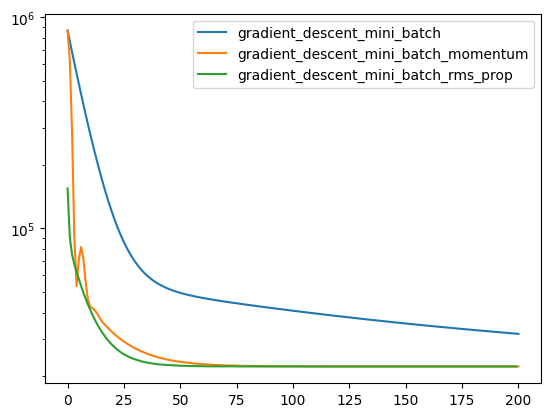

In [63]:
max_its = 200
w = np.array([3.0,3.0])
alpha = 0.005

gd_mini_batch_param_history, gd_mini_batch_cost_history = gradient_descent_mini_batch(least_squares, alpha, max_its, w.copy(), 
                                                                                      scaled_x, y, batch_size = 20)
print(gd_mini_batch_cost_history[-1])

momentum_gd_mini_batch_param_history, momentum_gd_mini_batch_cost_history = mini_batch_gradient_descent_momentum(least_squares, alpha, max_its, w.copy(), 
                                                                                      scaled_x, y, batch_size = 20)
print(momentum_gd_mini_batch_cost_history[-1])


rms_prop_gd_mini_batch_param_history, rms_prop_gd_mini_batch_cost_history = mini_batch_gradient_descent_rmsprop(least_squares, alpha, max_its, w.copy(), 
                                                                                      scaled_x, y, batch_size = 20)
# Plot the graph here
print(rms_prop_gd_mini_batch_cost_history[-1])

plt.yscale("log")
plt.plot(gd_mini_batch_cost_history, label = "gradient_descent_mini_batch")
plt.plot(momentum_gd_mini_batch_cost_history, label = "gradient_descent_mini_batch_momentum")
plt.plot(rms_prop_gd_mini_batch_cost_history, label = "gradient_descent_mini_batch_rms_prop")
plt.legend()
plt.show()

865439.9275757578
54871.10078092039
24571.768762478856
22745.678005745864


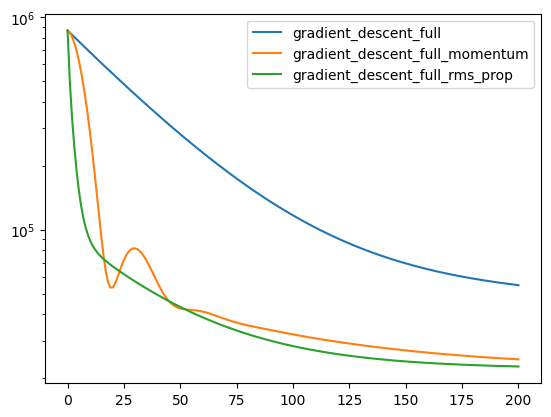

In [65]:
max_its = 200
w = np.array([3.0,3.0])
alpha = 0.005

gd_full_param_history, gd_full_cost_history = gradient_descent_full(least_squares, alpha, max_its, w.copy(), scaled_x, y)
print(gd_full_cost_history[-1])
momentum_gd_full_param_history, momentum_gd_full_cost_history = gradient_descent_full_momentum(least_squares, alpha, max_its, w.copy(), 
                                                                                      scaled_x, y)
print(momentum_gd_full_cost_history[-1])
rms_prop_gd_full_param_history, rms_prop_gd_full_cost_history = gradient_descent_full_rmsprop(least_squares, alpha, max_its, w.copy(), 
                                                                                      scaled_x, y)
print(rms_prop_gd_full_cost_history[-1])
# Plot the graph here
plt.yscale("log")
plt.plot(gd_full_cost_history, label = "gradient_descent_full")
plt.plot(momentum_gd_full_cost_history, label = "gradient_descent_full_momentum")
plt.plot(rms_prop_gd_full_cost_history, label = "gradient_descent_full_rms_prop")
plt.legend()
plt.show()

**Happy Learning!**